In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv
/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Have a look of the dataset

In [3]:
df=pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')
df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2171,2172,39,Male,Shorts,Clothing,98,Missouri,M,Yellow,Summer,4.6,No,Store Pickup,No,No,9,Cash,Fortnightly
1952,1953,57,Male,Shoes,Footwear,82,Maryland,L,Yellow,Summer,4.6,No,2-Day Shipping,No,No,50,Cash,Bi-Weekly
989,990,70,Male,Shoes,Footwear,31,Texas,M,Beige,Spring,3.1,Yes,Store Pickup,Yes,Yes,2,Bank Transfer,Monthly
2561,2562,32,Male,Hoodie,Clothing,20,New York,L,Magenta,Spring,2.7,No,Free Shipping,No,No,22,Debit Card,Quarterly
2529,2530,34,Male,Gloves,Accessories,62,Tennessee,M,Magenta,Spring,4.7,No,Next Day Air,No,No,48,Bank Transfer,Monthly
2224,2225,18,Male,Gloves,Accessories,25,Nebraska,L,Charcoal,Winter,4.3,No,Standard,No,No,38,Cash,Quarterly
3709,3710,31,Female,Socks,Clothing,43,Utah,M,Silver,Fall,3.6,No,Free Shipping,No,No,27,PayPal,Quarterly
3193,3194,63,Female,Gloves,Accessories,99,Virginia,L,Teal,Winter,4.0,No,Express,No,No,35,Credit Card,Fortnightly
2402,2403,45,Male,Scarf,Accessories,89,Utah,M,Brown,Winter,3.8,No,Free Shipping,No,No,31,Cash,Weekly
617,618,50,Male,Backpack,Accessories,57,Colorado,M,Maroon,Fall,2.6,Yes,Standard,Yes,Yes,2,Bank Transfer,Quarterly


**Customer ID:** A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

**Age:** The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

**Gender:** The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

**Item Purchased:** The specific product or item selected by the customer during the transaction.

**Category:** The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

**Purchase Amount (USD):** The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

**Location:** The geographical location where the purchase was made, offering insights into regional preferences and market trends.

**Size:** The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

**Color:** The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

**Season:** The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

**Review Rating:** A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

**Subscription Status:** Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

**Shipping Type:** Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

**Discount Applied:** Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

**Promo Code Used:** Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

**Previous Purchases:** Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

**Payment Method:** Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

**Frequency of Purchases:** Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.


# Shape of the Dataset

In [4]:
df.shape

(3900, 18)

# Insights of the whole dataset by 'info'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

***There are no missing values in this dataset***

# Looking at the statistics of the numerical attributes

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Once again see all the columns collectively

In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

# Counting Values of Categorical Columns

In [8]:
cat_columns = ['Gender','Item Purchased','Category','Location','Size','Color','Season','Subscription Status','Shipping Type','Promo Code Used','Payment Method','Frequency of Purchases','Discount Applied']
for i in cat_columns:
    print(df[i].value_counts(), end="\n\n")

Gender
Male      2652
Female    1248
Name: count, dtype: int64

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West

# Bar Graph b/w Number of items purchased and number of items purchased by age

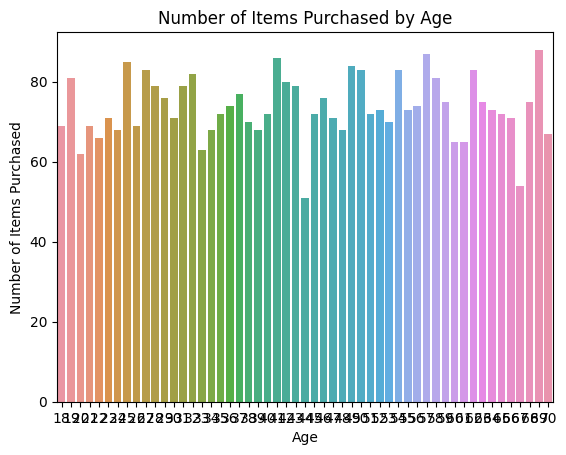

<Figure size 1600x600 with 0 Axes>

In [9]:
# Counting the number of items purchased by each age group
age_item_count = df.groupby('Age')['Item Purchased'].count().reset_index()
age_item_count.rename(columns={'Item Purchased': 'Count'}, inplace=True)

# Creating the bar plot
sns.barplot(x='Age', y='Count', data=age_item_count)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of Items Purchased')
plt.title('Number of Items Purchased by Age')
plt.figure(figsize=(16,6))
# Display the plot
plt.show()

# Pie Chart for looking the same distribution

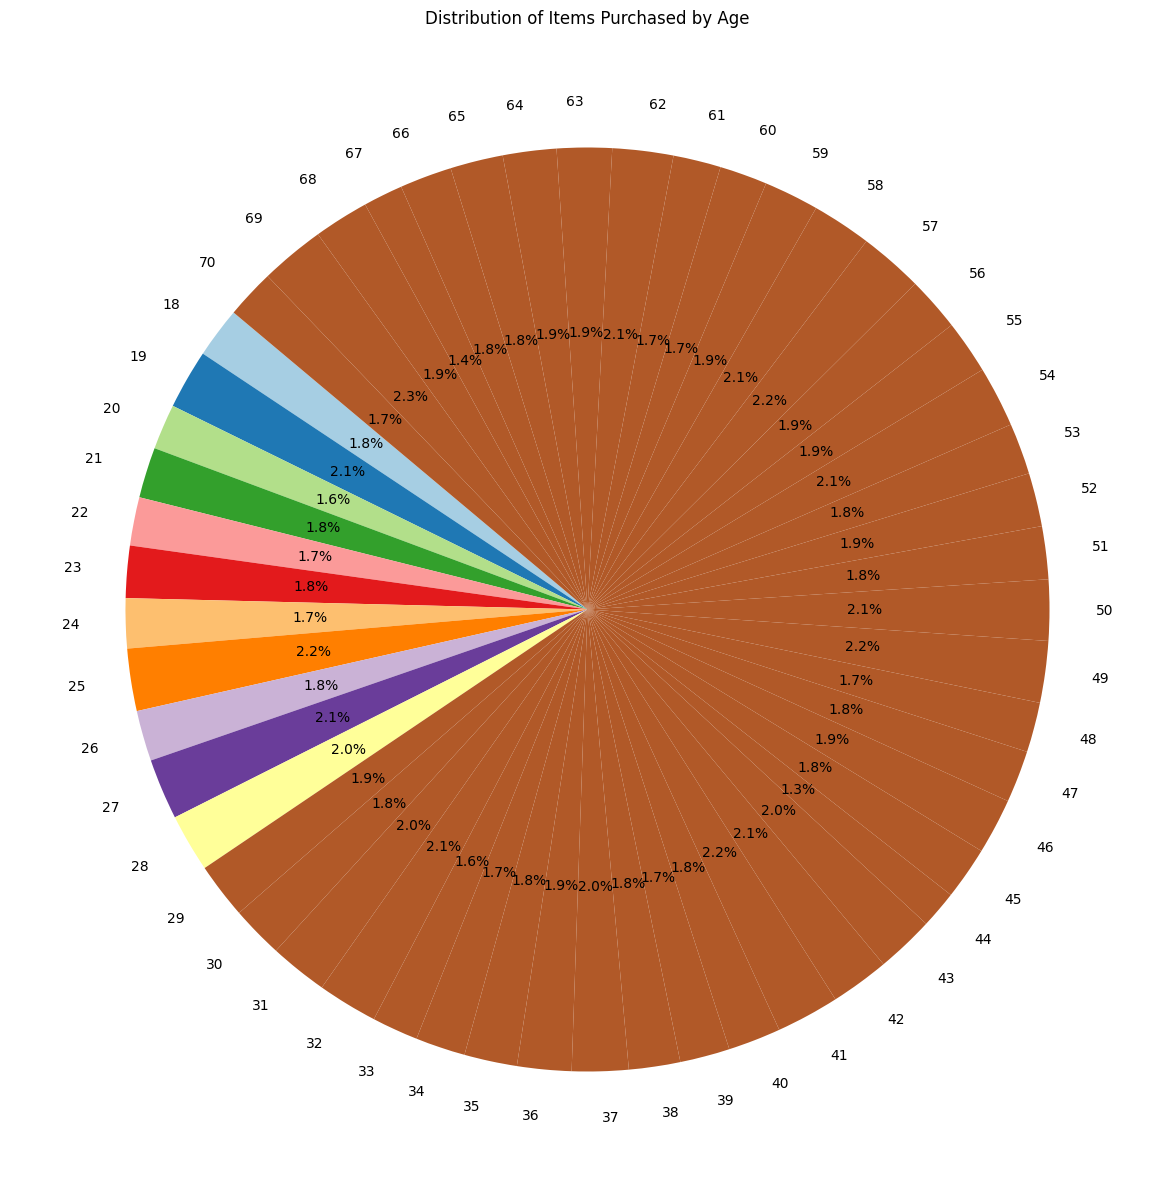

In [10]:
# Counting the number of items purchased by each age group
age_item_count = df.groupby('Age')['Item Purchased'].count().reset_index()
age_item_count.rename(columns={'Item Purchased': 'Count'}, inplace=True)

# Creating a pie chart
plt.figure(figsize=(17, 15)) 
plt.pie(age_item_count['Count'], labels=age_item_count['Age'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_item_count))))

# Adding a title
plt.title('Distribution of Items Purchased by Age')

# Display the pie chart
plt.show()

***This shows the distribution of total purchase (%) inside the circle & corresponding age outside the circle. From here we can conclude that more or less every Age group has almost same contribution in purchasing.***

# Number of items purchased by each gender

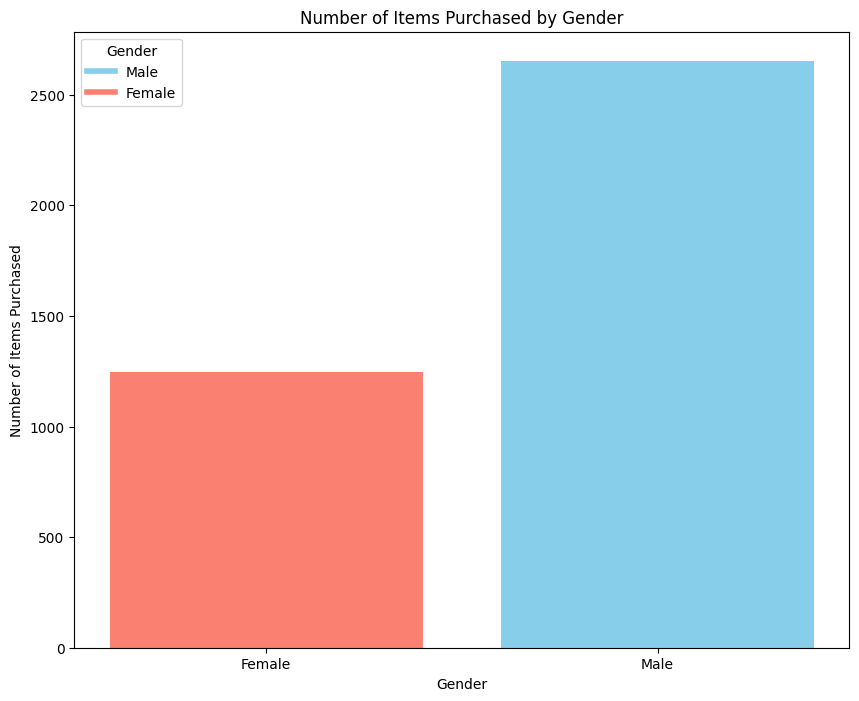

In [11]:
# Counting the number of items purchased by each gender
gender_item_count = df.groupby('Gender')['Item Purchased'].count().reset_index()
gender_item_count.rename(columns={'Item Purchased': 'Count'}, inplace=True)

# Creating the bar plot with different colors for Male and Female
plt.figure(figsize=(10, 8))  # Adjust the size as needed
colors = ['skyblue' if gender == 'Male' else 'salmon' for gender in gender_item_count['Gender']]
bars = plt.bar(gender_item_count['Gender'], gender_item_count['Count'], color=colors)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Items Purchased')
plt.title('Number of Items Purchased by Gender')

# Adding a legend
plt.legend(handles=[
    plt.Line2D([0], [0], color='skyblue', lw=4),
    plt.Line2D([0], [0], color='salmon', lw=4)
], labels=['Male', 'Female'], title='Gender')

# Display the plot
plt.show()

***Male customers are more than Female customers***

# Total Purchased amount by category

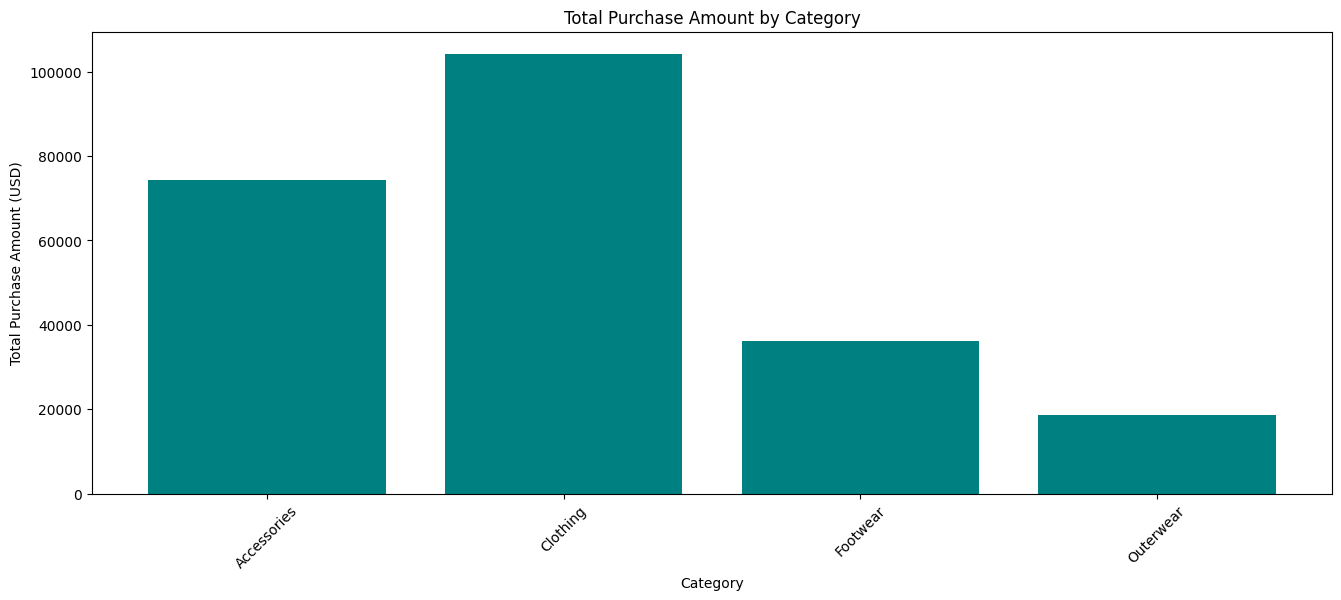

In [12]:
# Aggregating the total purchase amount by category
category_amount = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

# Creating the bar plot
plt.figure(figsize=(16, 6))  # Adjust the size as needed
plt.bar(category_amount['Category'], category_amount['Purchase Amount (USD)'], color='teal')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Category')

# Rotating x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Count of items purchased by size (L,S,M,XL)

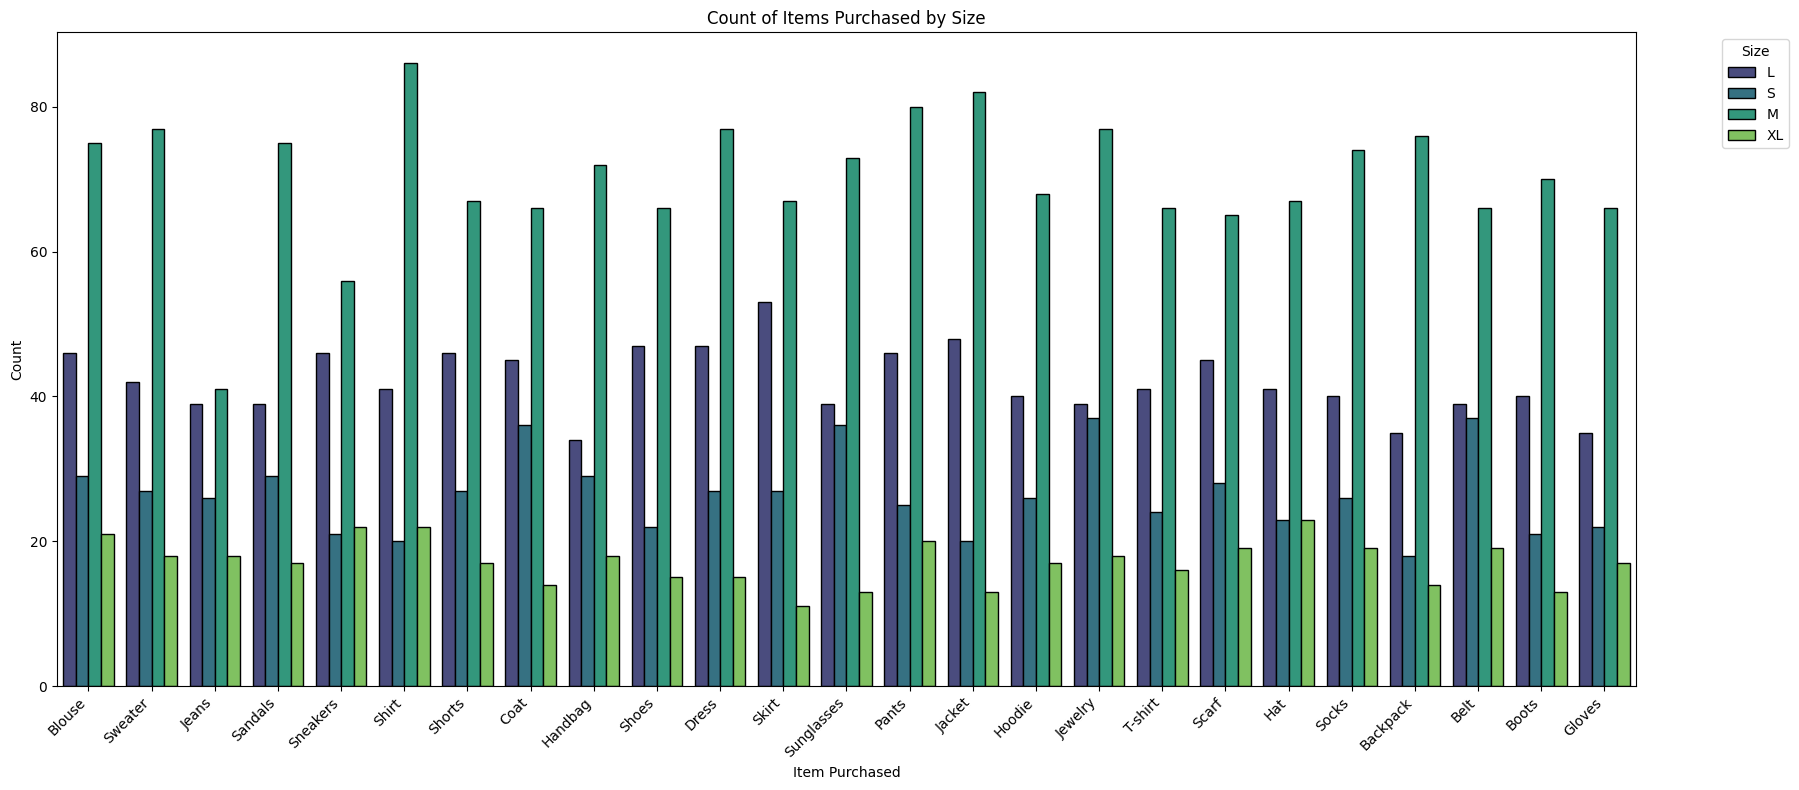

In [13]:
#Count of items Purchased by Size

plt.figure(figsize=(18,8))
ax = sns.countplot(x='Item Purchased', hue='Size', data=df, palette='viridis',edgecolor='k')
plt.title('Count of Items Purchased by Size')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.legend(title='Size',bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Mostly people buy M size Items and there are less people of XL sized.***

# Distribution of items purchased

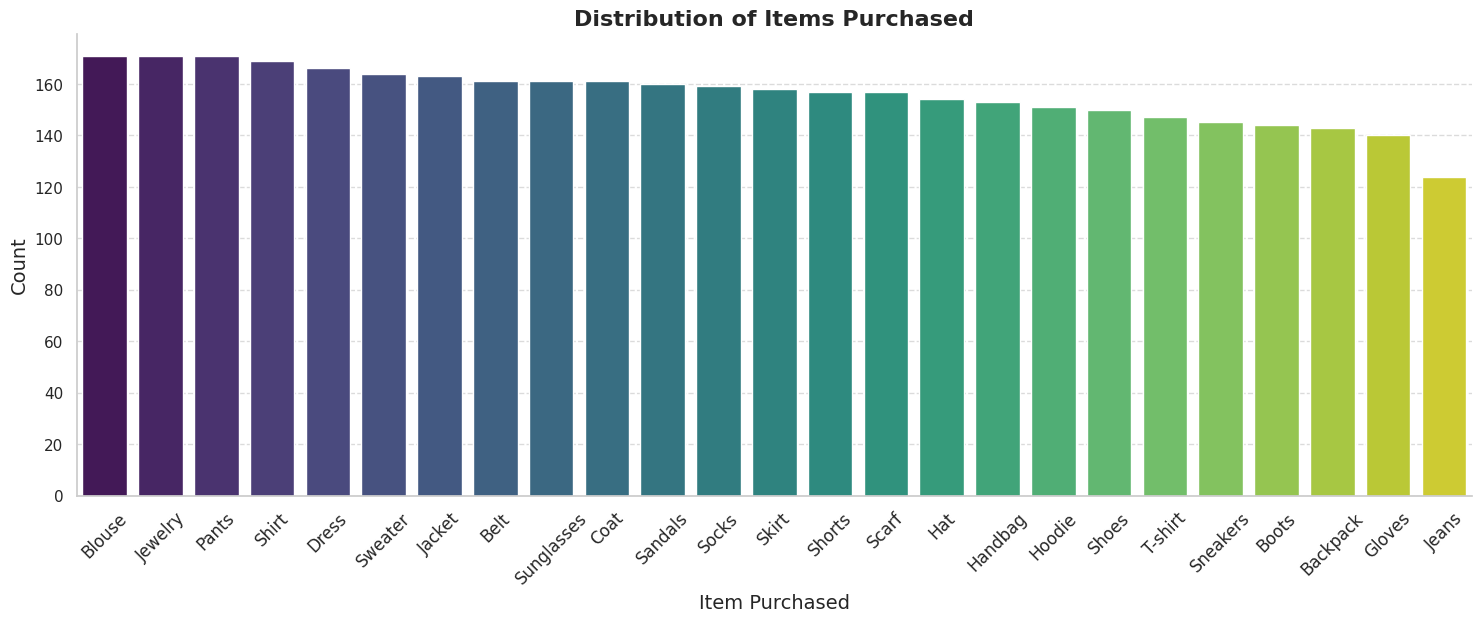

In [14]:
#countplot of Item Purchased

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(18, 6))
sns.countplot(
    data=df, 
    x='Item Purchased', 
    order=df['Item Purchased'].value_counts().index, 
    palette="viridis"  # Use a visually pleasing color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add title and labels with increased font size and custom font weight
plt.title('Distribution of Items Purchased', fontsize=16, fontweight='bold')
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add gridlines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()

# Frequency of purchases

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


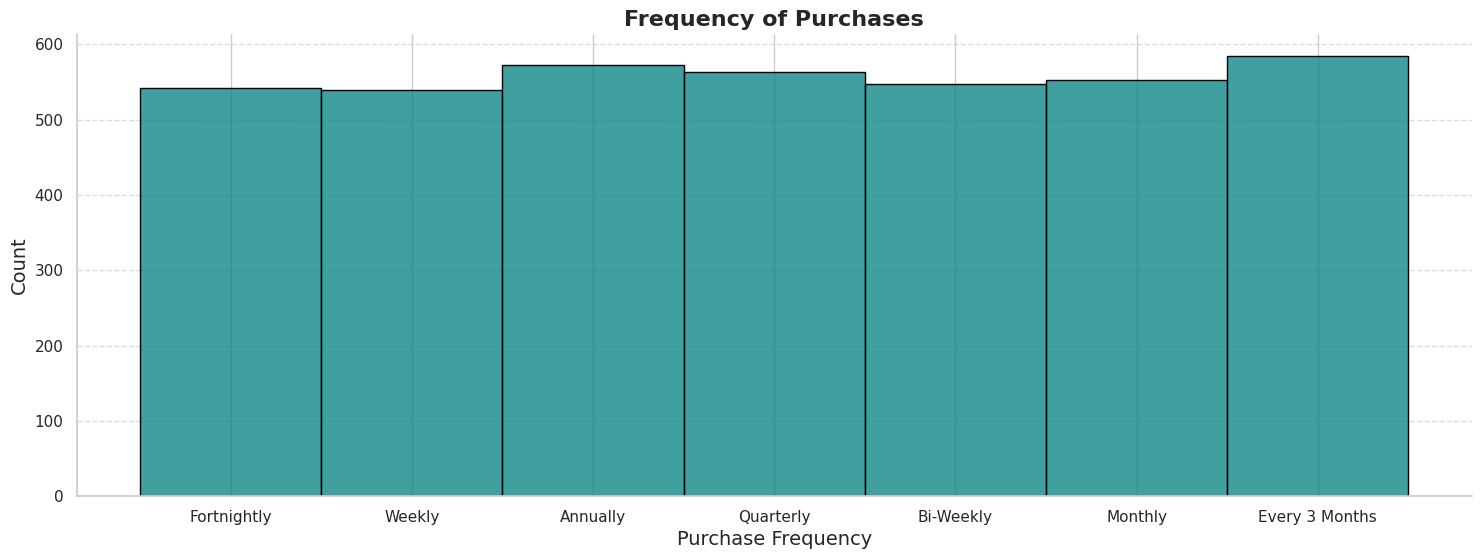

In [15]:
#Purchased Frequency
# Set the Seaborn style
sns.set(style="whitegrid")

# Create the histogram plot
plt.figure(figsize=(18, 6))
sns.histplot(df['Frequency of Purchases'], bins=30, kde=False, color='teal', edgecolor='black')

# Add title and labels with increased font size and custom font weight
plt.title('Frequency of Purchases', fontsize=16, fontweight='bold')
plt.xlabel('Purchase Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add gridlines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()

***Purchase frequency is quite good.***

# Label Encoding of the Categorical Columns

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in cat_columns
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Dropping the Customer ID feature as it has no value here

In [17]:
df = df.drop(columns=['Customer ID'])


In [39]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


# Divide the dataset into Dependent and Independent feaures

In [18]:
X = df.drop(columns=['Purchase Amount (USD)'])
y = df['Purchase Amount (USD)']

# Train-Test-Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Display the results
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 20.192208472927828
R-squared: -0.0010975245414326373


***We can say Performance is moderate because of the target column***

# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 20.51548717948718
R-squared: -0.03889939775759599


# Feature Importances according to the model RandomForest

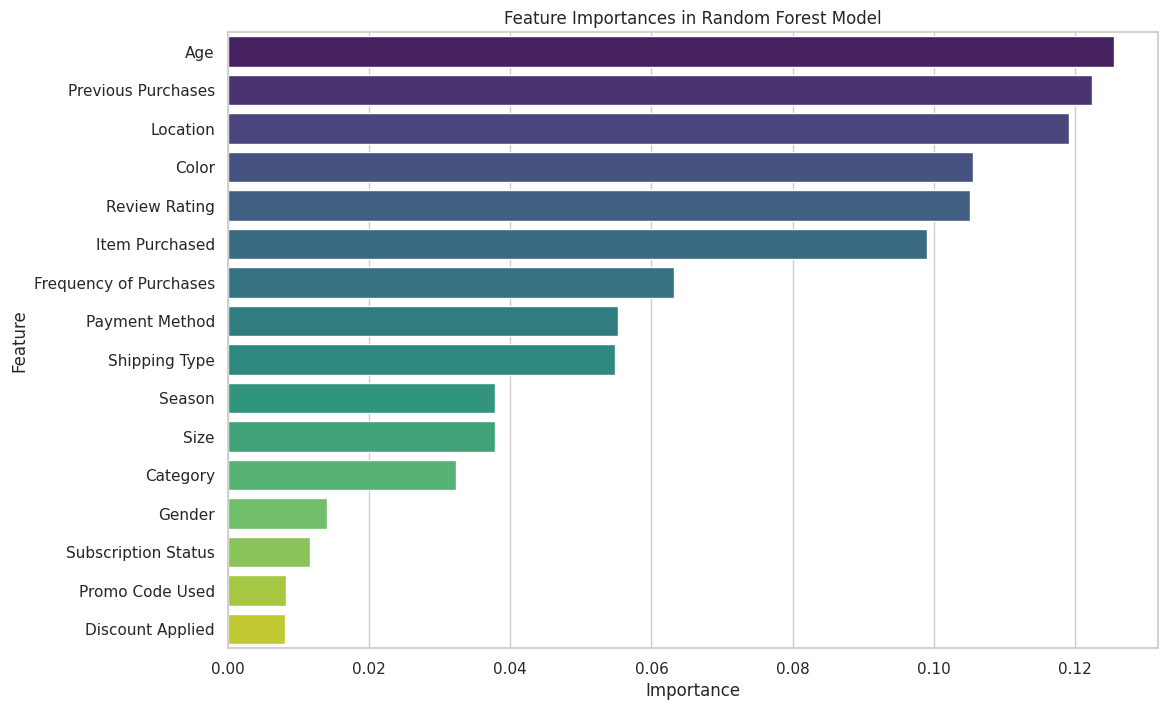

In [22]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Grid Search CV for RandomForest model for finding the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Optimization with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV:")
print(best_params)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)


Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


# Heatmap 

/tmp/ipykernel_93/4016433711.py:5: FutureWarning: The provided callable <function mean at 0x7cd4ac0acca0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = results.pivot_table(


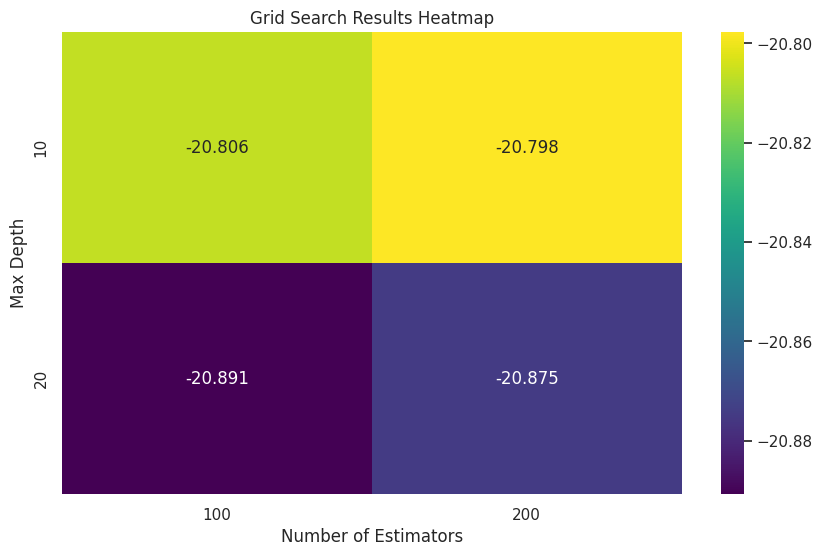

In [24]:
# Extracting results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Pivot the results into a format suitable for heatmap
heatmap_data = results.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score',
    aggfunc=np.mean
)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f')
plt.title('Grid Search Results Heatmap')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

***From the Heatmap we can see that {Max depth: 10, Number of Estimators: 200} has less neagative value, so this is the best hyperparameter for this model***

# MAE Score for RandomForest model

In [25]:
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Optimized Model Performance:")
print(f"MAE: {mae_optimized}") 
print(f"R²: {r2_optimized}") 

Optimized Model Performance:
MAE: 20.365684214401004
R²: -0.018522601281351525


# XGBoost Regressor

In [30]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f"R²: {r2}") 

Mean Absolute Error: 22.118252639281444
R²: -0.29994029202521566


# Grid Search CV for XGBoost

In [32]:
param_grid = {
    'objective': ['reg:squarederror'],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [0, 1, 10],
    'n_estimators': [100, 200, 300]
}


xg_reg = xgb.XGBRegressor()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MAE):", -grid_search.best_score_)  # Convert back to positive MAE

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)

# Evaluate the best model
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error of the best model: {mae}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}
Best Score (MAE): 20.662278737777317
Mean Absolute Error of the best model: 20.264899997222116


# Support Vector Regressor

In [33]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 20.25847136169687


# From all the above models we can see Linear Regresson has best performance 

In [35]:
import joblib
joblib.dump(lr, 'linear_regression_model.pkl')
print('lr_model saved successfully')

lr_model saved successfully


# ***Thank You!!***